In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Load and plot the data

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, nrows=100)

In [3]:
y_iris = df.iloc[0:100, 4].values
# If it is not Setosa then it is Versicolor
y_iris = np.where(y_iris == 'Iris-setosa', -1, 1)

# Features (sepal length and petal length)
x_iris = df.iloc[0:100, [0,2]].values

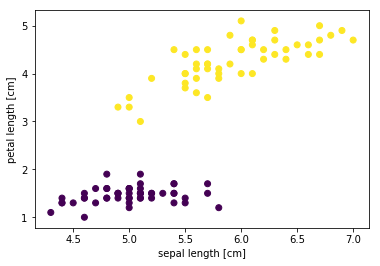

In [4]:
plt.scatter(x_iris[:,0], x_iris[:,1], c=y_iris)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

## Implement 1-neuron network (Perceptron)

In [5]:
class Perceptron():
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        
    def activation(self, x):
        # Sigmoid activation
        return 1/(1 + np.exp(-x))
        
    def forward(self, x):
        return self.activation(np.dot(x, self.weights) + self.bias) # BLANK
    

In [6]:
perceptron = Perceptron(2)
print(perceptron.weights, perceptron.bias)

[0.44591638 0.91258924] 0.6715785451394987


In [7]:
x = np.array([1,1])

perceptron.forward(x)

0.8839197137211197

In [8]:
# Does it also work on multiple inputs simutounasly?
x = np.array([[1,1],[2,2], [3,3]])
perceptron.forward(x)

array([0.88391971, 0.96734603, 0.99139778])

## Gradient descent

In [9]:
def get_loss(y_predicted, y_true):
    # Sum of squared errors
    error = y_predicted - y_true # BLANK
    loss = np.square(error).sum() / 2.0 # BLANK
    return loss
    
def get_gradient(x, y_predicted, y_true):
    grad_weights = x.T.dot(y_true - y_predicted) # BLANK
    grad_bias = np.sum(y_true - y_predicted) #BLANK
    return grad_weights, grad_bias
    

def train(network, x, y, epochs, lr):
    losses = []
    for epoch in range(epochs):
        y_predicted = network.forward(x)
        loss = get_loss(y_predicted, y)
        grad_weights, grad_bias = get_gradient(x, y_predicted, y)
        network.weights += lr*grad_weights # BLANK
        network.bias += + lr*grad_bias # BLANK
        losses.append(loss)
    
    return losses

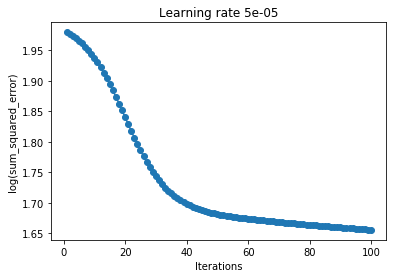

In [15]:
perceptron = Perceptron(2)
epochs = 100
lr = 0.00005
losses = train(perceptron, x_iris, y_iris, epochs, lr)
plt.plot(range(1, len(losses)+1), np.log10(losses), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(sum_squared_error)')
plt.title('Learning rate '+ str(lr))
plt.show()

## Multilayer network

In [16]:
class TwoLayerNN():
    def __init__(self, input_size, hidden_size):
        self.weights1 = np.random.rand(input_size, hidden_size)
        self.bias1 = np.random.rand(1, hidden_size)
        self.weights2 = np.random.rand(hidden_size)
        self.bias2 = np.random.rand(1)
        
    def activation(self, x):
        # Sigmoid activation
        return 1/(1 + np.exp(-x))
    
    #Derivative of actviation(sigmoid Function_
    def sigmoid_derivative(self, x):
         return x * (1 - x)
    
    def layer1(self, x):
        return self.activation(np.dot(x, self.weights1) + self.bias1) # BLANK
    
    def layer2(self, x):
        return self.activation(np.dot(x, self.weights2) + self.bias2) # BLANK
        
    def forward(self, x):
        return self.layer2(self.layer1(x))
    
    def update_weights(self, x, y_predicted, y_true):
        # TODO 
        hiddenlayer_activations = self.layer1(x)
        error = y_true - y_predicted
        d_output = error * self.sigmoid_derivative(y_predicted)
        d_hiddenlayer = d_output.dot(self.weights2.T) * self.sigmoid_derivative(hiddenlayer_activations)
        grad_weights1 = x.T.dot(d_hiddenlayer)
        grad_bias1 = np.sum(d_hiddenlayer, axis=0,keepdims=True)
        grad_weights2 = hiddenlayer_activations.T.dot(d_output) # BLANK
        grad_bias =  np.sum(d_output, axis=0,keepdims=True) #BLANK
        
        self.weights1 += grad_weights1 * lr
        self.bias1 += grad_bias1 * lr
        self.weights2 += grad_weights2 * lr
        self.bias2 += grad_bias2 * lr

In [17]:
network = TwoLayerNN(2, 3)
print(network.weights1.shape, network.bias1.shape, network.weights2.shape, network.bias2.shape)

(2, 3) (1, 3) (3,) (1,)


In [18]:
x = [[1,1], [2,1], [1,2]]
network.forward(x)

array([0.82088084, 0.82947596, 0.83481811])

In [19]:
# To do: SGD
def get_loss(y_predicted, y_true):
    # Sum of squared errors
    error = y_predicted - y_true # BLANK
    loss = np.square(error).sum() / 2.0 # BLANK
    return loss

def train(network, x, y, epochs, lr):
    losses = []
    for epoch in range(epochs):
        y_predicted = network.forward(x)
        loss = get_loss(y_predicted, y)
        network.update_weights(x, y_predicted, y)
        losses.append(loss)
    
    return losses

In [20]:
perceptron = TwoLayerNN(2, 3)
epochs = 10
lr = 0.0001
losses = train(perceptron, x_iris, y_iris, epochs, lr)
plt.plot(range(1, len(losses)+1), np.log10(losses), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(sum_squared_error)')
plt.title('Learning rate '+ str(lr))
plt.show()

ValueError: shapes (100,) and (3,) not aligned: 100 (dim 0) != 3 (dim 0)